In [66]:
!pip install catboost

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [80]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [83]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from xgboost import XGBRegressor
from catboost import Pool, CatBoostRegressor, cv


In [12]:
train = pd.read_csv("data/Train_maskedv2.csv")
test  = pd.read_csv("data/Test_maskedv2.csv")
sub   = pd.read_csv("data/samplesubmissionv2.csv")

In [13]:
train.head()

,ward,total_households,total_individuals,target_pct_vunerable,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,...,lan_11,lan_12,lan_13,lan_14,pg_00,pg_01,pg_02,pg_03,pg_04,lgt_00
0,9D9BEUB,13569.97801,39024.03083,1.739801,0.354806,0.004781,0.170498,0.007861,0.006796,0.023082,...,0.001723,0.027796,0,0.026727,0.524666,0.041460,0.394550,0.029031,0.010292,0.599259
1,RERH3XM,13593.88256,32879.94646,1.993381,0.262140,0.002066,0.077669,0.000597,0.000977,0.003759,...,0.041982,0.021312,0,0.015754,0.993900,0.001829,0.000854,0.000586,0.002832,0.699136
2,GJWA3BO,2698.30050,8261.71093,0.038340,0.728101,0.002292,0.051663,0.008209,0.001444,0.005089,...,0.014786,0.005827,0,0.049384,0.990007,0.003582,0.002546,0.003201,0.000663,0.972315
3,GW6VRB7,1965.96698,9069.77694,7.411006,0.613206,0.138127,0.004999,0.002704,0.000000,0.002788,...,0.003087,0.003136,0,0.013562,0.928682,0.004464,0.009854,0.054701,0.002299,0.735333
4,CN9JZJC,1852.07821,9908.84404,8.223907,0.797462,0.120830,0.060677,0.001155,0.001042,0.000508,...,0.000117,0.001471,0,0.000000,0.994072,0.000476,0.004033,0.000704,0.000714,0.646964


In [16]:
train.shape

(3174, 50)

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3174 entries, 0 to 3173
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ward                  3174 non-null   object 
 1   total_households      3174 non-null   float64
 2   total_individuals     3174 non-null   float64
 3   target_pct_vunerable  3174 non-null   float64
 4   dw_00                 3174 non-null   float64
 5   dw_01                 3174 non-null   float64
 6   dw_02                 3174 non-null   float64
 7   dw_03                 3174 non-null   float64
 8   dw_04                 3174 non-null   float64
 9   dw_05                 3174 non-null   float64
 10  dw_06                 3174 non-null   float64
 11  dw_07                 3174 non-null   float64
 12  dw_08                 3174 non-null   float64
 13  dw_09                 3174 non-null   float64
 14  dw_10                 3174 non-null   float64
 15  dw_11                

In [15]:
train.describe()

,total_households,total_individuals,target_pct_vunerable,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,...,lan_11,lan_12,lan_13,lan_14,pg_00,pg_01,pg_02,pg_03,pg_04,lgt_00
count,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,...,3174.000000,3174.000000,3174.0,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000
mean,3429.319013,12407.679534,10.258947,0.710593,0.097372,0.031894,0.005820,0.008202,0.006047,0.022225,...,0.050327,0.012342,0.0,0.014335,0.863095,0.041924,0.017665,0.073692,0.003624,0.830599
std,3117.342795,9310.300318,12.847192,0.217458,0.188484,0.078634,0.018592,0.029408,0.023772,0.036762,...,0.153493,0.020594,0.0,0.041155,0.248096,0.146524,0.074607,0.169049,0.010378,0.208129
min,1.000000,402.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.011053,0.000000,0.000000,0.000000,0.000000,0.001692
25%,1668.367500,6972.024960,0.429761,0.591480,0.002919,0.002421,0.000000,0.000000,0.000000,0.002676,...,0.000453,0.002477,0.0,0.000000,0.879603,0.000960,0.000848,0.000445,0.000633,0.788085
50%,2263.921720,9217.504670,3.715314,0.766925,0.010649,0.005792,0.000803,0.000603,0.000813,0.008408,...,0.003092,0.006266,0.0,0.000097,0.989811,0.003088,0.001753,0.001206,0.001630,0.909446
75%,3681.155303,13463.543668,17.762604,0.885571,0.074650,0.028085,0.002538,0.002145,0.002921,0.025111,...,0.028330,0.013430,0.0,0.011548,0.995798,0.012419,0.004636,0.039255,0.004025,0.963780
max,39595.195110,91716.746370,100.000000,0.994962,0.931490,0.951806,0.264239,0.392085,0.435912,0.412936,...,0.991674,0.367785,0.0,0.998448,1.000000,0.969519,0.939564,0.940563,0.367842,1.000000


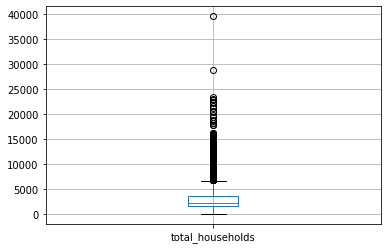

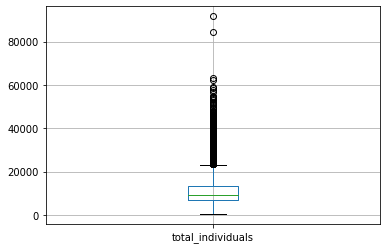

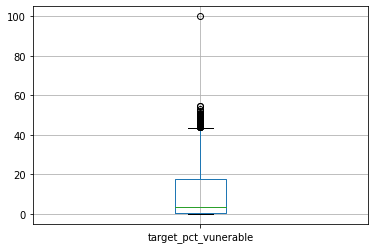

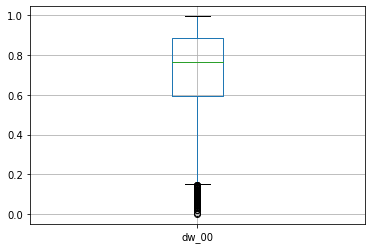

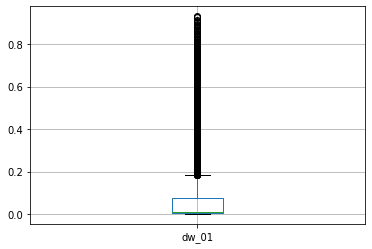

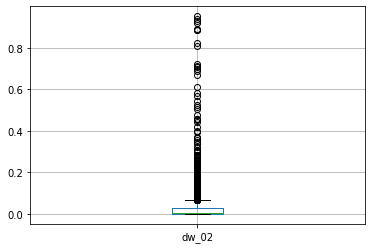

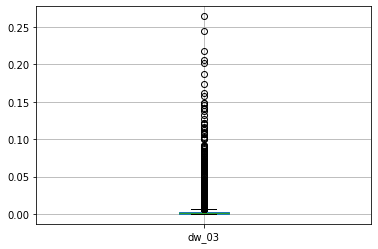

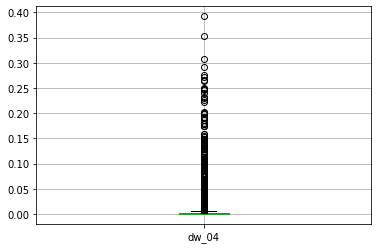

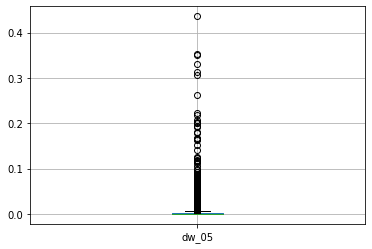

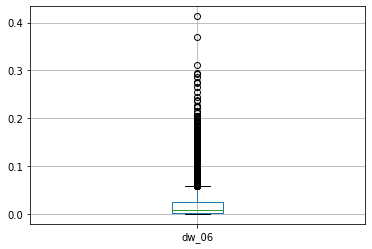

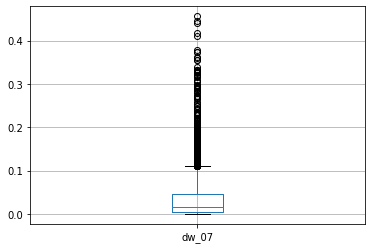

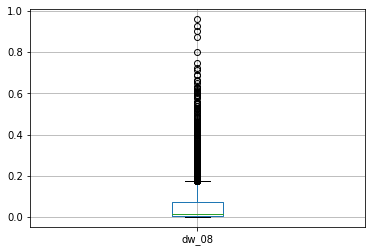

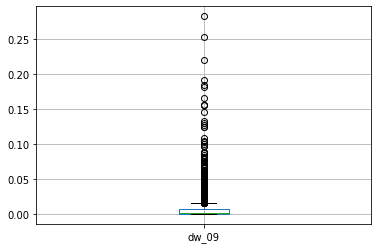

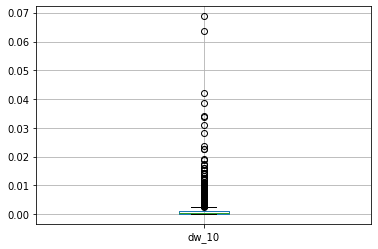

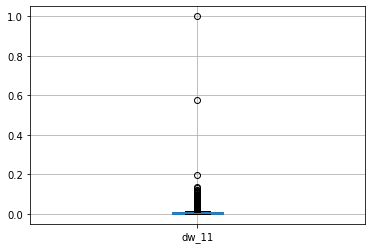

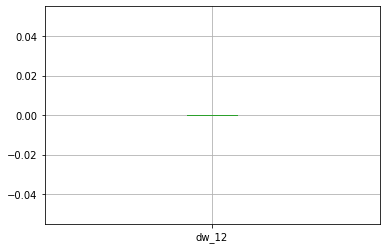

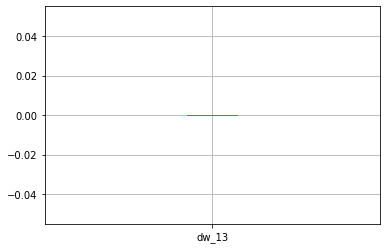

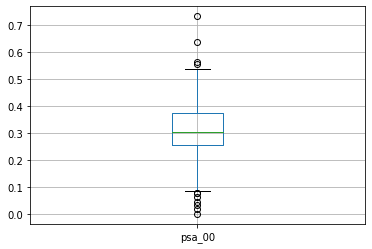

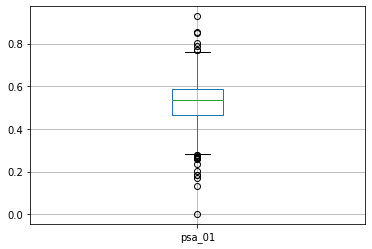

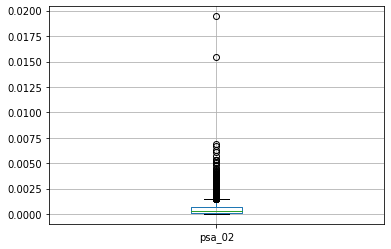

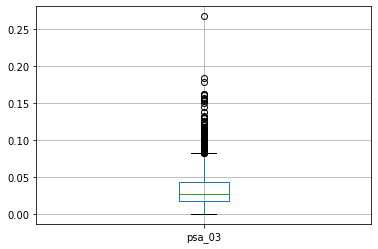

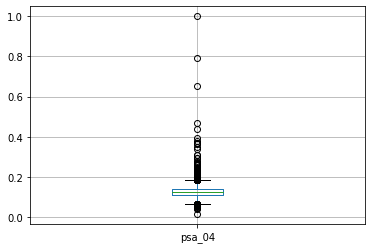

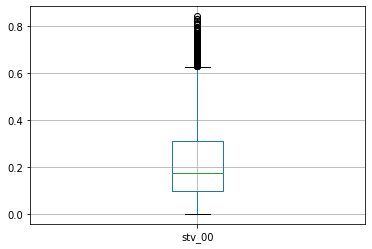

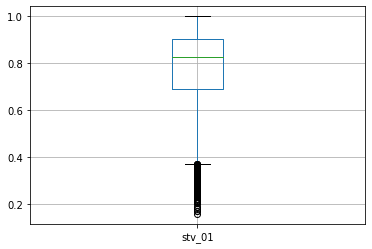

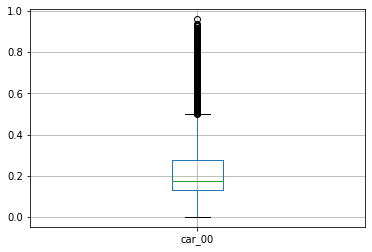

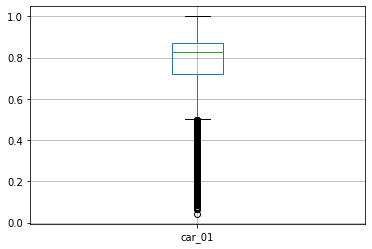

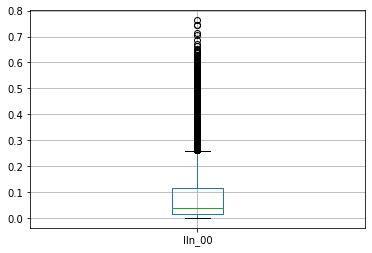

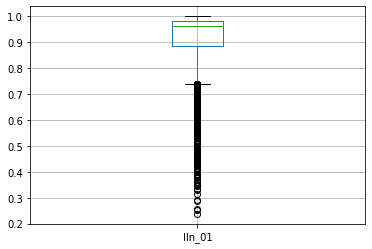

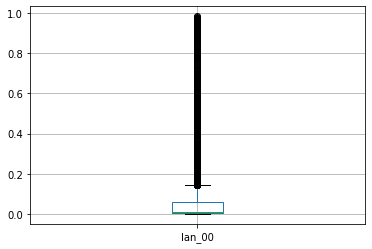

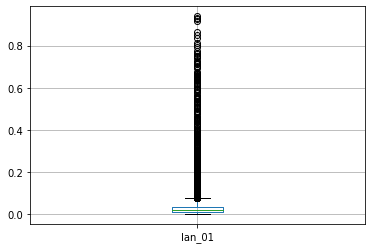

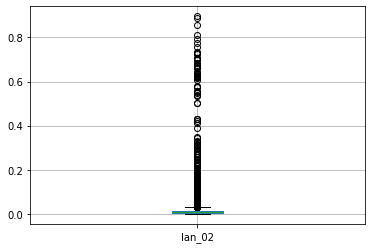

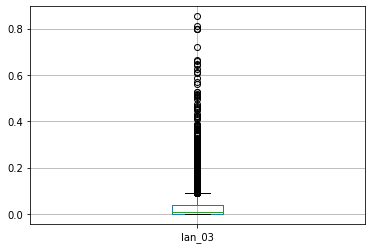

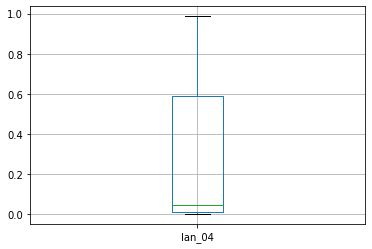

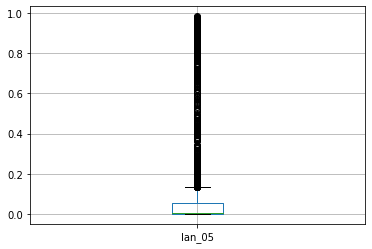

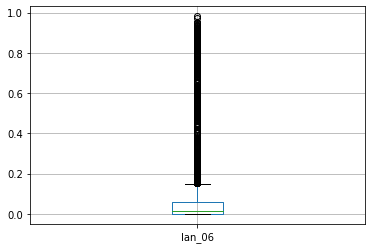

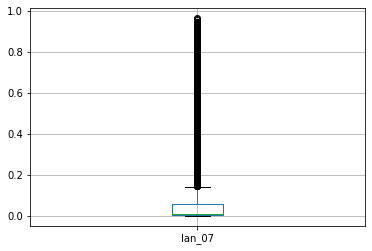

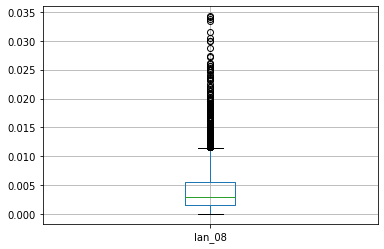

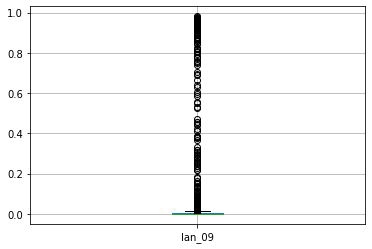

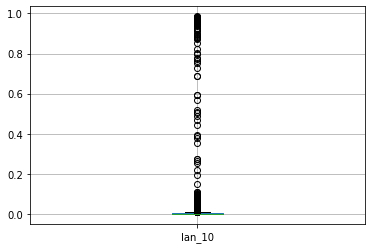

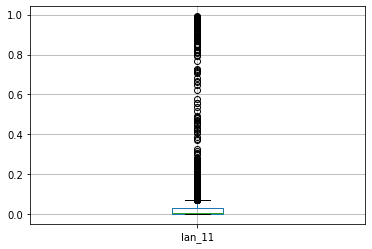

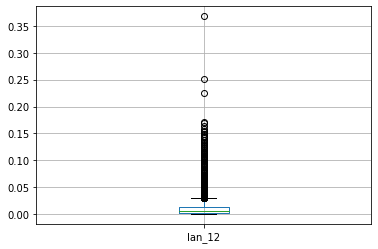

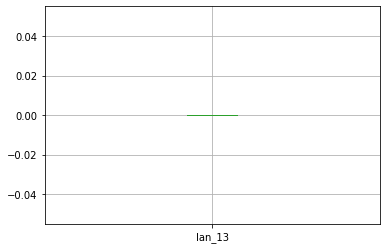

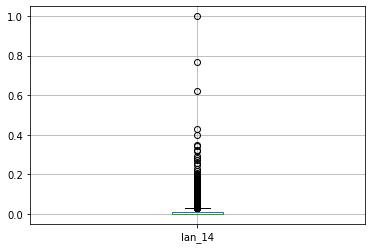

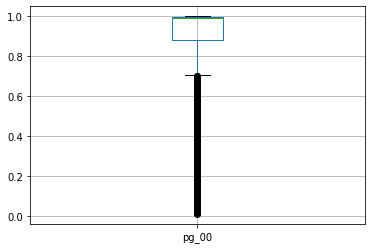

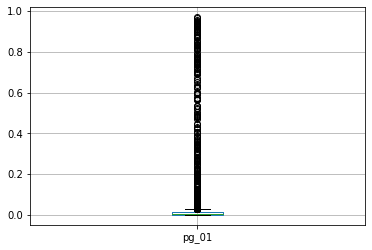

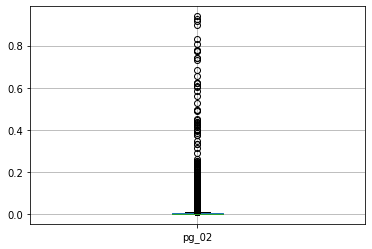

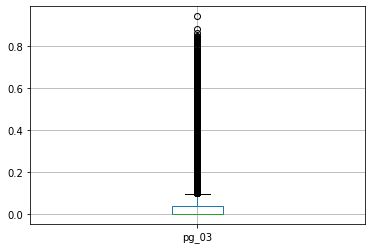

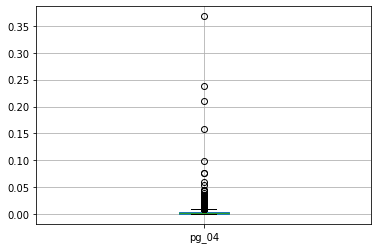

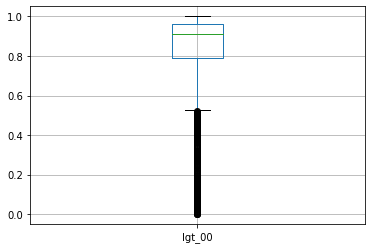

In [33]:
columns = train.drop('ward', axis=1).columns
for index in range(len(columns)):
    train.boxplot(column=[columns[index]])
    plt.show()

In [ ]:
target = train['target_pct_vunerable']

train['separateur'] = 0
test['separateur']  = 1

train, test = train.align(test, join = 'inner', axis = 1)

fullDataSet = pd.concat([train, test])

In [36]:
fullDataSet['household_size'] = fullDataSet.total_individuals/fullDataSet.total_households

fullDataSet['gf_1'] = fullDataSet['dw_01'] * fullDataSet['psa_01']
fullDataSet['gf_2'] = fullDataSet['gf_1'] * fullDataSet['psa_00']
fullDataSet['gf_3'] = fullDataSet['gf_1'] * fullDataSet['psa_02']
fullDataSet['gf_4'] = fullDataSet['gf_1'] * fullDataSet['psa_03']
fullDataSet['gf_5'] = fullDataSet['gf_1'] * fullDataSet['gf_2']
fullDataSet['gf_6'] = fullDataSet['gf_5'] * fullDataSet['gf_2']

fullDataSet['dw_01_2']  = fullDataSet['dw_01'] ** 2
fullDataSet['psa_00_2'] = fullDataSet['psa_00'] ** 2

luxury_stuff     = ['psa_01','car_01','stv_00']
not_luxury_stuff = ['psa_00','car_00','stv_01']

fullDataSet['luxury_stuff']       = fullDataSet[luxury_stuff].sum(axis=1)
fullDataSet['not_luxury_stuff']   = fullDataSet[not_luxury_stuff].sum(axis=1)
fullDataSet['a_luxury_stuff']     = fullDataSet[luxury_stuff].mean(axis=1)
fullDataSet['a_not_luxury_stuff'] = fullDataSet[not_luxury_stuff].mean(axis=1)

In [43]:
train = fullDataSet[fullDataSet.separateur == 0]
test  = fullDataSet[fullDataSet.separateur == 1]

train.drop(columns=['separateur'], axis = 1, inplace = True)
test.drop(columns=['separateur'], axis = 1, inplace = True)

/home/fouzo/.local/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [107]:
train_cp = train.drop(columns=['ward', 'dw_13', 'dw_12', 'lan_13', 'psa_03'], axis=1)
test_cp  = test.drop(columns=['ward', 'dw_13', 'dw_12', 'lan_13', 'psa_03'], axis=1)

In [108]:
km = KMeans(150, random_state=2020)
km = km.fit(train_cp)

train_cp["km"] = km.predict(train_cp)
test_cp["km"]  = km.predict(test_cp)


In [109]:
train_cp = (train_cp - train_cp.mean())/train_cp.std()

test_cp = (test_cp - test_cp.mean())/test_cp.std()

In [111]:
X = train_cp.copy()
y = target.copy()

X_train, X_test, y_train, y_test   = train_test_split(X, y, test_size=0.25, random_state=2020)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=2020)

In [112]:
def perform_model(X_train, y_train,X_valid, y_valid,X_test, y_test):
    model = CatBoostRegressor(
        random_seed = 400,
        loss_function = 'RMSE',
        iterations=400,
    )
    
    model.fit(
        X_train, y_train,
        eval_set=(X_valid, y_valid),
        verbose=False
    )
    
    print("RMSE on training data: "+ model.score(X_train, y_train).astype(str))
    print("RMSE on test data: "+ model.score(X_test, y_test).astype(str))
    
    return model

In [113]:
model = perform_model(X_train, y_train,X_valid, y_valid,X_test, y_test)

RMSE on training data: 0.9794581051047002
RMSE on test data: 0.7474042558990217


In [114]:
feature_score = pd.DataFrame(list(zip(X.dtypes.index, model.get_feature_importance(Pool(X, label=y)))),
                columns=['Feature','Score'])

feature_score = feature_score.sort_values(by='Score', ascending=False, inplace=False, kind='quicksort', na_position='last')

In [115]:
feature_score

,Feature,Score
44,household_size,5.899018
22,lln_00,4.297998
14,psa_00,3.868434
17,psa_04,3.551237
18,stv_00,3.410642
27,lan_03,3.387363
31,lan_07,3.334761
15,psa_01,3.269928
30,lan_06,3.064629
43,lgt_00,2.927634


In [116]:
np.array(feature_score[feature_score['Score'] > 2.50].Feature)

array(['household_size', 'lln_00', 'psa_00', 'psa_04', 'stv_00', 'lan_03',
       'lan_07', 'psa_01', 'lan_06', 'lgt_00', 'lan_05', 'gf_6', 'pg_00',
       'dw_00', 'lan_04'], dtype=object)

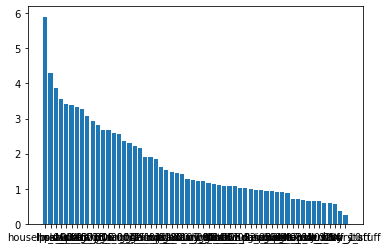

In [117]:
plt.bar(feature_score['Feature'], feature_score['Score'])
plt.show()

In [118]:
best_feature_1 = ['household_size', 'lln_00', 'psa_00', 'psa_04', 'stv_00', 'lan_03',
       'lan_07', 'psa_01', 'lan_06', 'lgt_00', 'lan_05', 'gf_6', 'pg_00',
       'dw_00', 'lan_04']

In [119]:
model = perform_model(X_train[best_feature_1], y_train,X_valid[best_feature_1], y_valid,X_test[best_feature_1], y_test)

RMSE on training data: 0.9527600477749231
RMSE on test data: 0.7466665215627508


In [ ]:
RMSE on training data: 0.987367823478132
RMSE on test data: 0.7474485769303281

In [120]:
pred_1 = model.predict(test_cp[best_feature_1])

In [121]:
pred_1

array([ 7.8051468 , 21.05887514,  2.26227521, ...,  2.10829363,
        5.34595035,  3.4941479 ])

In [122]:
sub.head()

,ward,target_pct_vunerable
0,00A93O0,13.145430
1,01V40KO,30.230701
2,01ZHVW0,4.170653
3,028YQJX,0.551644
4,02G8W11,0.374350


In [123]:
sub['target_pct_vunerable'] = pd.DataFrame(np.absolute(pred_1))

In [124]:
sub.head()

,ward,target_pct_vunerable
0,00A93O0,7.805147
1,01V40KO,21.058875
2,01ZHVW0,2.262275
3,028YQJX,2.968766
4,02G8W11,0.751649


In [125]:
sub.to_csv('submission_stack_2.csv',index=False)